In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [94]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv');

In [95]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
df.shape

(42000, 785)

In [97]:
import matplotlib.pyplot as plt

In [98]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
29259,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


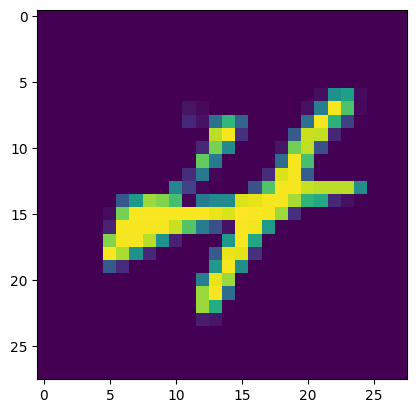

In [99]:
plt.imshow(df.iloc[32811,1:].values.reshape(28,28))

In [100]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2  , random_state = 42)

In [103]:
X_train.shape

(33600, 784)

In [104]:
Y_train

34941    6
24433    5
24432    3
8832     4
30291    7
        ..
6265     9
11284    9
38158    2
860      6
15795    0
Name: label, Length: 33600, dtype: int64

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
knn = KNeighborsClassifier()

In [107]:
knn.fit(X_train , Y_train)

KNeighborsClassifier()

In [108]:
import time
start = time.time()
Y_pred = knn.predict(X_test)
print(time.time()-start)

14.189563512802124


In [109]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.9648809523809524

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
scaler = StandardScaler()

In [112]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [113]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = None)

In [114]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [115]:
X_train_trf.shape

(33600, 784)

In [116]:
knn = KNeighborsClassifier()

In [117]:
knn.fit(X_train_trf,Y_train)

KNeighborsClassifier()

In [118]:
import time
start = time.time()
Y_pred = knn.predict(X_test_trf)
print(time.time()-start)

9.103791952133179


In [119]:
accuracy_score(Y_test,Y_pred)

0.6432142857142857

In [120]:
pca = PCA(n_components = 2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [121]:
X_train_trf

array([[-2.71862236, -0.49002812],
       [-0.67695931, -6.75375678],
       [-3.03324334,  6.50981306],
       ...,
       [ 2.14882511,  0.78150903],
       [ 1.05958051,  0.94746822],
       [17.70259937,  1.9619241 ]])

In [122]:
import plotly.express as px

In [124]:
Y_train_trf = Y_train.astype(str)
fig = px.scatter(
    x=X_train_trf[:,0],
    y=X_train_trf[:,1],
    color=Y_train_trf,
    color_discrete_sequence=px.colors.qualitative.G10
)

fig.show()

In [125]:
pca = PCA(n_components = 3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [126]:
Y_train_trf = Y_train.astype(str)
fig = px.scatter_3d(df,
    x=X_train_trf[:,0],
    y=X_train_trf[:,1],
    z=X_train_trf[:,2],
    color=Y_train_trf,
)
fig.update_layout(
    margin=dict(l=20 , r=20 , t=20 , b=20)
)

fig.show()

In [129]:
# Eigen values
pca.explained_variance_

array([40.87278366, 28.96627985, 27.04279994])

In [132]:
# eigen vectors
pca.components_

array([[-5.35965787e-18, -3.04195443e-18, -3.48594563e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-7.94020765e-17, -2.31852628e-17, -2.53326213e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.33192606e-16, -7.02671266e-17, -6.45846353e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [133]:
pca.components_.shape

(3, 784)

In [135]:
pca.explained_variance_ratio_

array([0.06054506, 0.0429079 , 0.04005864])

In [136]:
pca = PCA(n_components = None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)

In [138]:
# Eigen values
pca.explained_variance_.shape

(784,)

In [139]:
pca.components_.shape

(784, 784)

In [140]:
pca.explained_variance_ratio_

array([6.05450635e-02, 4.29078990e-02, 4.00586385e-02, 3.06434453e-02,
       2.67082572e-02, 2.30605039e-02, 2.03205581e-02, 1.90427586e-02,
       1.67430484e-02, 1.50209240e-02, 1.44712146e-02, 1.30785247e-02,
       1.19412334e-02, 1.16799146e-02, 1.12682944e-02, 1.07180984e-02,
       1.01060309e-02, 1.00952174e-02, 9.61045504e-03, 9.47906601e-03,
       9.08552837e-03, 8.53606160e-03, 8.25990213e-03, 8.07304529e-03,
       7.86749539e-03, 7.63654074e-03, 7.43262890e-03, 7.13098479e-03,
       7.01533517e-03, 6.74454768e-03, 6.69432230e-03, 6.51996133e-03,
       6.39433310e-03, 6.10336315e-03, 6.02070722e-03, 5.92590082e-03,
       5.88410511e-03, 5.73944937e-03, 5.62305540e-03, 5.40195282e-03,
       5.28091679e-03, 5.23145401e-03, 5.12090062e-03, 5.04713335e-03,
       4.87084315e-03, 4.77416222e-03, 4.68990375e-03, 4.68130866e-03,
       4.60304339e-03, 4.54798125e-03, 4.46756591e-03, 4.43306830e-03,
       4.36595190e-03, 4.27394974e-03, 4.19992637e-03, 4.15142048e-03,
      

In [141]:
np.cumsum(pca.explained_variance_ratio_)

array([0.06054506, 0.10345296, 0.1435116 , 0.17415505, 0.2008633 ,
       0.22392381, 0.24424437, 0.26328712, 0.28003017, 0.2950511 ,
       0.30952231, 0.32260084, 0.33454207, 0.34622198, 0.35749028,
       0.36820838, 0.37831441, 0.38840962, 0.39802008, 0.40749915,
       0.41658467, 0.42512074, 0.43338064, 0.44145368, 0.44932118,
       0.45695772, 0.46439035, 0.47152133, 0.47853667, 0.48528122,
       0.49197554, 0.4984955 , 0.50488983, 0.5109932 , 0.5170139 ,
       0.5229398 , 0.52882391, 0.53456336, 0.54018641, 0.54558837,
       0.55086928, 0.55610074, 0.56122164, 0.56626877, 0.57113961,
       0.57591378, 0.58060368, 0.58528499, 0.58988803, 0.59443601,
       0.59890358, 0.60333665, 0.6077026 , 0.61197655, 0.61617648,
       0.6203279 , 0.6243674 , 0.62836904, 0.632244  , 0.63608538,
       0.63988348, 0.64363517, 0.64732886, 0.65099829, 0.65461534,
       0.65818137, 0.66169008, 0.66515602, 0.66856668, 0.67192998,
       0.67525401, 0.67855196, 0.68178585, 0.68499317, 0.68817

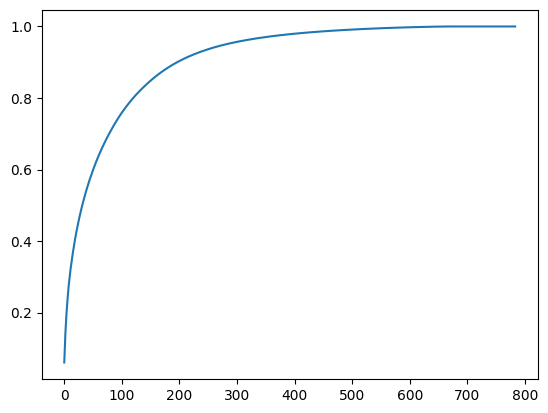

In [142]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))